# 00 — Explore Datasets

**Objective:**  
Perform exploratory analysis of the <dataset_name> dataset — understand structure, consistency, label schema, and sample image quality.

---

In [3]:
# 00_explore_datasets_<dataset_name>

## 1. Import Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import json
import random
from pathlib import Path


### Look at the PlantVillage Dataset

In [19]:
from pathlib import Path

color_dir = Path(r"C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\archive\plantvillage dataset\color")
gray_dir = Path(r"C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\archive\plantvillage dataset\grayscale")
seg_dir = Path(r"C:\Users\User\Desktop\Data Science\Projects\crop-disease-detection\data\raw\archive\plantvillage dataset\segmented")

print(color_dir.exists(), gray_dir.exists(), seg_dir.exists())


True True True


Explore folder structure

In [20]:
def explore_structure(path):
    classes = [d.name for d in path.iterdir() if d.is_dir()]
    counts = {cls: len(list((path / cls).glob("*.jpg"))) for cls in classes}
    df = pd.DataFrame(list(counts.items()), columns=["Class", "Image Count"])
    df = df.sort_values("Image Count", ascending=False)
    return df

df_color = explore_structure(color_dir)
df_gray = explore_structure(gray_dir)
df_seg = explore_structure(seg_dir)

print(f"Color images: {df_color['Image Count'].sum():,}")
print(f"Grayscale images: {df_gray['Image Count'].sum():,}")
print(f"Segmented images: {df_seg['Image Count'].sum():,}")


Color images: 54,303
Grayscale images: 54,303
Segmented images: 54,306


Look at some images of plants

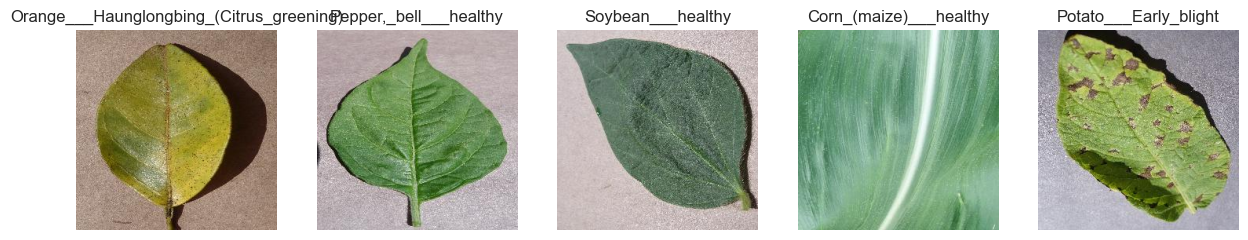

In [22]:
# look at some images of plants
def plot_sample_images(path, n=5):
    classes = [d.name for d in path.iterdir() if d.is_dir()]
    sample_classes = random.sample(classes, n)
    
    plt.figure(figsize=(15, 5))
    for i, cls in enumerate(sample_classes):
        img_path = random.choice(list((path / cls).glob("*.jpg")))
        img = Image.open(img_path)
        
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()

plot_sample_images(color_dir, n=5)

Look at the image distribution by leaf type

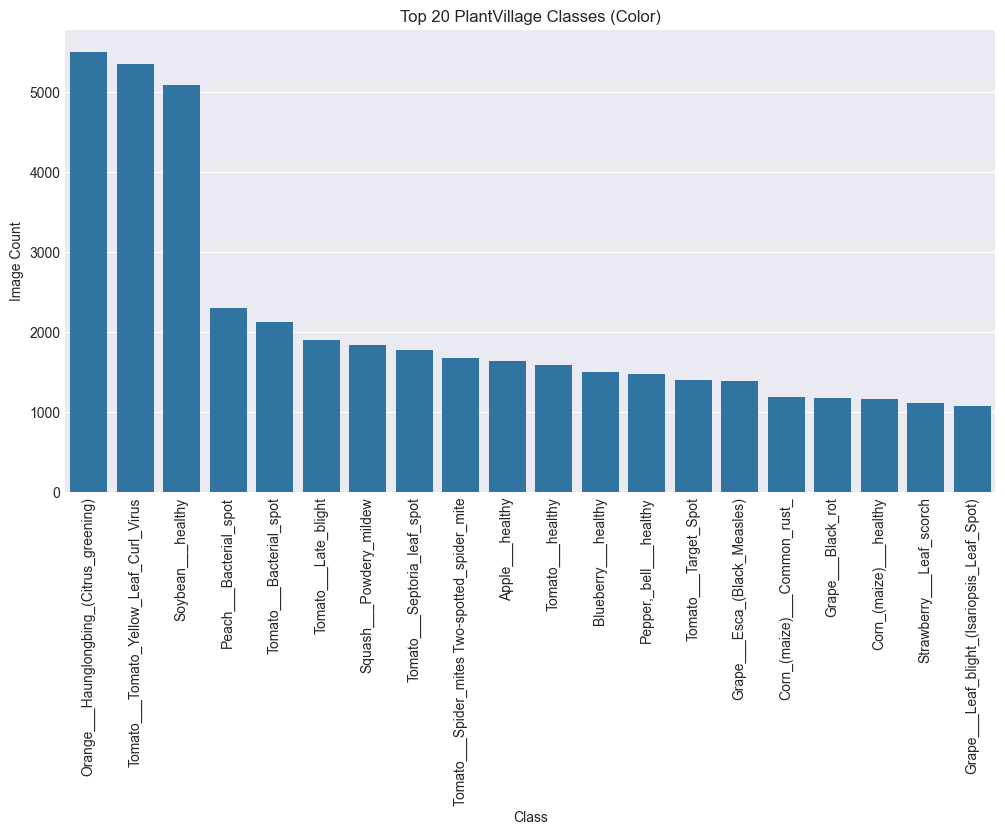

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_color.head(20), x="Class", y="Image Count")
plt.xticks(rotation=90)
plt.title("Top 20 PlantVillage Classes (Color)")
plt.show()


Explore class consistency

In [24]:
set_color = set(df_color['Class'])

# prints set() empty then its perfectly alligned
print("Missing classes in Grayscale:", set_color - set(df_gray['Class']))

Missing classes in Grayscale: set()
